version list : ['m1_t1_lr0.0001', 'm1_t1_lr0.0002', 'version_default', 'oneshot_m1_t1_1']

version : oneshot_m1_t1_1

INFO | 2019.01.19 - 22h:18m:02s
INFO | main.py --gpu 2 --version oneshot_m1_t1_1 --batch_size 32 --num_epoch 200 --lr 0.001
INFO |  -------------------- setting --------------------
INFO |     version : oneshot_m1_t1_1
INFO |     model save path : saved_model/
INFO |     gpu : 2
INFO |     number of epochs : 200
INFO |     batch size : 32
INFO |     learning rate : 0.001
INFO |     data path : dataset/
INFO |  -------------------- setting --------------------


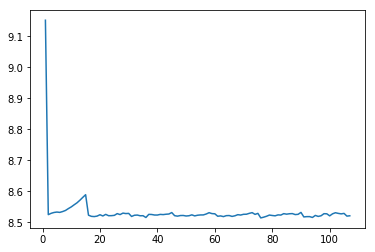

INFO |  ------- model training start -------
INFO |     epoch 1/200 done | avg.loss : 8.58937
INFO |     epoch 2/200 done | avg.loss : 8.52434
INFO |     epoch 3/200 done | avg.loss : 8.52439
INFO |     epoch 4/200 done | avg.loss : 8.52436
INFO |     epoch 5/200 done | avg.loss : 8.52434
INFO |     epoch 6/200 done | avg.loss : 8.52424
INFO |     epoch 7/200 done | avg.loss : 8.52429


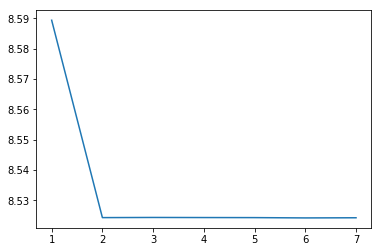

In [155]:
import os
versions = os.listdir('log')
for i, item in enumerate(versions):
    versions[i] = item[:-4]

version = versions[-1]
print('version list : {}'.format(versions))
print()
print('version : {}'.format(version))
print()

%matplotlib inline
import matplotlib.pyplot as plt
path = 'log/'+version+'.log'
with open(path,'r') as f:
    lines = f.readlines()

for i, line in enumerate(lines):
    if '------- model training start -------' in line :
        idx = i
        break
    if line.strip() == 'INFO |':
        pass
    else:
        print(line.strip())

xs = []
ys = []
flag = 0

j=1
for i,line in enumerate(lines):
    if i<idx:
        continue
    if 'DEBUG' not in line:
        continue
    if 'completed' in line :
        break
    xs.append(j)
    ys.append(float(line.split()[-1]))
    j+=1
        
#plt.scatter(xs,ys)
plt.plot(xs,ys)
plt.show()

for i,line in enumerate(lines):
    if '------- model training start -------' in line:
        print(line.strip())
    if 'done' in line:
        print(line.strip())
    if 'completed' in line:
        print(line.strip())
        
xs = []
ys = []

j=1
for i, line in enumerate(lines):
    if 'done' in line:
        xs.append(j)
        ys.append(float(line.split()[-1]))
        j+=1
        
plt.plot(xs,ys)
plt.show()


In [129]:
import json
json_path='dataset/data.json'
json_data = json.loads(open(json_path).read())

In [130]:
json_data['class']

{'w_f48451c': 0,
 'w_c3d896a': 1,
 'w_20df2c5': 2,
 'new_whale': 3,
 'w_dd88965': 4,
 'w_64404ac': 5,
 'w_a6f9d33': 6,
 'w_581ba42': 7,
 'w_cb622a2': 8,
 'w_d3b46e7': 9,
 'w_8cad422': 10,
 'w_13ae3d4': 11,
 'w_3de579a': 12,
 'w_1d0830e': 13,
 'w_2ba6978': 14,
 'w_8dddbee': 15,
 'w_2365d55': 16,
 'w_3879fa0': 17,
 'w_9c506f6': 18,
 'w_8a6a8d5': 19,
 'w_662530e': 20,
 'w_a8b34a0': 21,
 'w_c0d11da': 22,
 'w_50e8d58': 23,
 'w_3881f28': 24,
 'w_9ad3551': 25,
 'w_cee684e': 26,
 'w_41d24c6': 27,
 'w_8a235b6': 28,
 'w_2e231f4': 29,
 'w_6822dbc': 30,
 'w_df86a42': 31,
 'w_700ebb4': 32,
 'w_d892cd9': 33,
 'w_7a4b2f9': 34,
 'w_bc285a6': 35,
 'w_c70fbcd': 36,
 'w_778e474': 37,
 'w_f3252ff': 38,
 'w_2df85e7': 39,
 'w_c7cda47': 40,
 'w_62bb54b': 41,
 'w_c6c89db': 42,
 'w_1531bf5': 43,
 'w_4e1e04d': 44,
 'w_d6ca28d': 45,
 'w_1260eb5': 46,
 'w_fccccec': 47,
 'w_acd217a': 48,
 'w_5650932': 49,
 'w_c98aaad': 50,
 'w_dd944b7': 51,
 'w_6f0cbe3': 52,
 'w_6cfa650': 53,
 'w_6e209a8': 54,
 'w_1ea5d96': 55,
 '

In [131]:
len(json_data['train'])

5005

In [123]:
import pandas as pd
submission='m1_t1_lr0.0001_epoch-59.pth'
submission_data_path = 'submission/'+submission+'.csv'
submission_data = pd.read_csv(submission_data_path)


In [126]:
submission_data

,Image,Id
0,38d64079c.jpg,w_8f4b1c4 w_8a35001 w_3f0fd95 w_fc230fd w_2fe1c3f
1,679f798b4.jpg,w_a375d95 w_d5d111d w_f77e282 w_7c26ef7 w_17ba5e4
2,984de26cc.jpg,w_eec42d0 w_bdb3a05 w_1de6148 w_5ff73b9 w_30a7b3f
3,162ecd9d9.jpg,w_fe95c92 w_8fda8b2 w_6f62459 w_3d1f606 w_1f78a1e
4,7cf1cb2a4.jpg,w_0513962 w_fe95c92 w_c562eba w_f4f3715 w_aea4301
5,1420db2ca.jpg,w_e04d084 w_ec64e27 w_6755824 w_5cc8711 w_140a9ac
6,b8cf925bf.jpg,w_20df2c5 w_dd88965 w_64404ac w_a6f9d33 w_581ba42
7,f19c73261.jpg,w_2ba6978 w_8dddbee w_62bb54b w_4e1e04d w_acd217a
8,85e4d3922.jpg,w_3b955d1 w_1e283bb w_7cc7ec6 w_faad3f8 w_0f1cf57
9,7efc384cb.jpg,w_a70b90b w_262c32f w_d9405b3 w_fc94e17 w_4a01f24
